In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import numpy as np

#pre-parameters data
file_name           = r"\{}.csv"

#run parameters
rerun               = True
file_identifier     = "spy_1min_20211213_20220117_split_adjusted"
time_steps_inputs   = [1e0, 2e0, 3e0, 4e0, 5e0, 6e0, 7e0, 8e0, 9e0,
                    1e1, 2e1, 3e1, 4e1, 5e1, 6e1, 7e1, 8e1, 9e1, 
                    1e2, 2e2, 3e2, 4e2, 5e2, 6e2, 7e2, 8e2, 9e2, 
                    1e3, 2e3, 3e3, 4e3, 5e3, 6e3, 7e3, 8e3, 9e3, 1e4]

#data
folder_location         = r"C:\Users\Fabio\OneDrive\Documents\Studies\Econophysics\econophysics-project\Data"
file_name               = file_name.format("spy_1min_20211213_20220117_split_adjusted")
file_location           = folder_location + file_name
df_file_path            = folder_location + file_name + "_df.csv"
df_velocity_file_path   = folder_location + file_name + "_df_velocity.csv"

df_file_path            = folder_location + "\\" + file_identifier + "_df.csv"
df_velocity_file_path   = folder_location + "\\" + file_identifier + "_df_velocity.csv"

In [2]:
def return_price_dynamic_data(df_input=file_location, price_string="Close*", return_plot=True, scale_to_first_value=True):

    df_close = extract_close_value(df_input=df_input, price_string=price_string, scale_to_first_value=scale_to_first_value)
    
    #calculate deltas
    df_close["delta"] = np.zeros(len(df_close.index))
    for i in df_close.index[1:]:
        df_close.loc[int(i), "delta"] = df_close[price_string][int(i) - 1] - df_close[price_string][int(i)]
    df_close["delta"][0] = df_close["delta"][1]

    #produce plots and return values
    if return_plot == True:
        fig, axs = plt.subplots(2)
        fig.suptitle('Vertically stacked subplots')
        axs[0].plot(df_close[price_string])
        axs[1].plot(df_close["delta"])
        return fig, df_close
    elif return_plot == False:
        return df_close

def extract_close_value(df_input=file_location, price_string="Close*", scale_to_first_value=True):
    if isinstance(df_input, str):
        df = pd.read_csv(df_input)
    else:
        df = df_input
    
    #df = df[::100]
    
    #handle strings
    if isinstance(df[price_string][0], str):
        df[price_string] = df[price_string].str.replace(',','')
        df[price_string] = df[price_string].astype(float)
    df_close     = pd.DataFrame(df[price_string])
    
    if scale_to_first_value == True:
        scale = df_close[price_string][0]
        df_close[price_string] = df_close[price_string] / scale
    return df_close

def convert_close_to_velocity(df):
    output = []
    for i, j in zip(df["close"][1:], df["close"][:-1]):
        output = output + [float(i) - float(j)]
    df_output = pd.DataFrame(output, columns=["close"], index=df.index[1:])
    return df_output
    

def return_sigma_delta_t(df_input=file_location, price_string="close", return_change_in_velocity=False, return_plot=True, scale_to_first_value=True, delta_ts=range(1, 11)):
    sigma_delta = dict()
    
    df = extract_close_value(df_input=df_input, price_string=price_string, scale_to_first_value=scale_to_first_value)
    if return_change_in_velocity == True:
        df_velocity = convert_close_to_velocity(df)
    
    
    sigma_delta_t = []
    
    #calculate deltas
    for incri in delta_ts:
        #df[str(incri)] = np.nan(len(df.index))
        df[str(int(incri))] = np.nan
        for time_step in df.index[int(incri):]:
            df.loc[time_step, str(int(incri))] = df[price_string][time_step - incri] - df[price_string][time_step]
        r = df[str(int(incri))].std()
        sigma_delta[str(int(incri))] = r
        print(str(int(incri)) + ":" + str(r))
    return sigma_delta, df, df_velocity

if rerun == True:
    results, df, df_velocity = return_sigma_delta_t(df_input=file_location, delta_ts=time_steps_inputs, return_change_in_velocity=True)#
    print(results)
    df.to_csv(df_file_path)
    df_velocity.to_csv(df_velocity_file_path)
else:
    results     = {'1': 0.0011127556383582632, '2': 0.0015724562633629656, '3': 0.0019245713655369377, '4': 0.002221721887246732, '5': 0.0024826636082608423, '6': 0.0027184338477607506, '7': 0.002933013155556164, '8': 0.0031333243562753346, '9': 0.003320761131972847, '10': 0.003497729531951798, '20': 0.004941430573166447, '30': 0.006043027411310573, '40': 0.006981724271364932, '50': 0.007807200857797963, '60': 0.008567304291153802, '70': 0.009257933349893806, '80': 0.009901619840260332, '90': 0.010510259328254369, '100': 0.011080870152355364, '200': 0.015688195239834495, '300': 0.019268180168364606, '400': 0.022382616769257582, '500': 0.025030632637293913, '600': 0.02740357542454326, '700': 0.029587894531001593, '800': 0.03147037603011776, '900': 0.03315713672949477, '1000': 0.03474127102943585}
    df          = pd.read_csv(df_file_path)
    df.set_index(df.columns[0], inplace=True)
    df_velocity = pd.read_csv(df_velocity_file_path)
    df_velocity.set_index(df_velocity.columns[0], inplace=True)

1:0.0007415225922198024
2:0.0010429991872767292
3:0.0012732782814066687
4:0.0014621772851029795
5:0.0016267893639614441
6:0.001775082189792317
7:0.0019103676811797802
8:0.002034356894642457
9:0.0021508739090489097
10:0.0022598861053533662
20:0.003152918234427754
30:0.0038170290433068334
40:0.004371934306396319
50:0.004862268774748129
60:0.00531753338870927
70:0.005727004333196742
80:0.00610614096213366
90:0.006459471281677941
100:0.006791947717457137
200:0.009555309988510332
300:0.011819321345083136
400:0.013697949829949466
500:0.015225460938450069
600:0.016551480971352176
700:0.017793378891301885
800:0.018981554416858656
900:0.020139367339720556


Please copy the results into this markup cell:


data = {1:0.0007415225922198024, 2:0.0010429991872767292, 3:0.0012732782814066687, 4:0.0014621772851029795, 5:0.0016267893639614441, 6:0.001775082189792317, 7:0.0019103676811797802, 8:0.002034356894642457, 9:0.0021508739090489097, 
10:0.0022598861053533662, 20:0.003152918234427754, 30:0.0038170290433068334, 40:0.004371934306396319, 50:0.004862268774748129, 60:0.00531753338870927, 70:0.005727004333196742, 80:0.00610614096213366, 90:0.006459471281677941, 
100:0.006791947717457137, 200:0.009555309988510332, 300:0.011819321345083136, 400:0.013697949829949466, 500:0.015225460938450069, 600:0.016551480971352176, 700:0.017793378891301885, 800:0.018981554416858656, 900:0.020139367339720556, 
1000:0.021240216459533147, 2000:0.02992465990604354, 3000:0.0362638176335767, 4000:0.04235637151824035, 5000:0.04843573125531474, 6000:0.05344479448087987, 7000:0.05834345510813164, 8000:0.06216521536017538, 9000:0.06544886284064635, 
10000:0.06836877480106653}

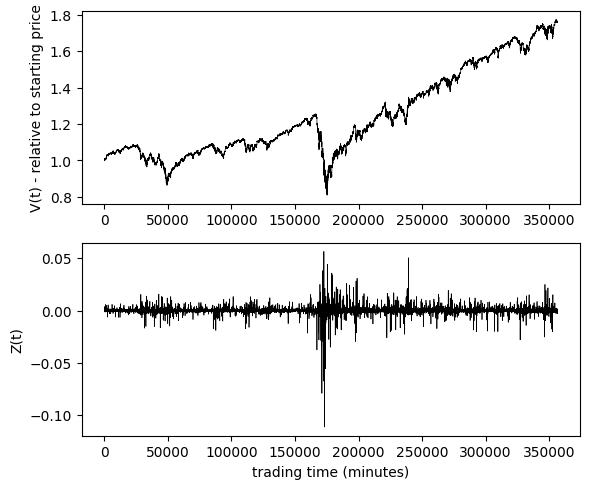

In [ ]:
# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5))

# Plot 1: Log-log scale
ax1.plot(df.index, df["close"].values, color="black", linewidth=0.5)
ax1.set_ylabel('V(t) - relative to starting price')
#ax1.set_title('Standard velocity deviation against time-jump')

# Plot 2: Linear scale
ax2.plot(df_velocity.index, df_velocity["close"].values, color="black", linewidth=0.5)
ax2.set_xlabel('trading time (minutes)')
ax2.set_ylabel('Z(t)')
#ax2.set_title('Linear Plot')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Plot results

C:\Users\Fabio\AppData\Local\Temp\ipykernel_4992\1037325061.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax1.loglog(trendline_x, trendline_y, 'r-', label=f'Trendline (Slope = {slope:.2f})', color="black")


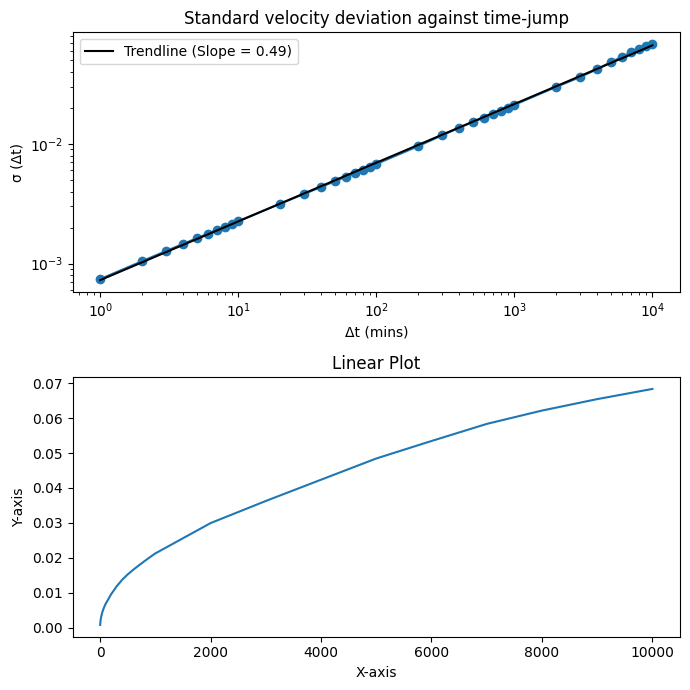

In [ ]:
# Data for the plots
x = list(map(float, results.keys()))
y = list(map(float, results.values()))

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))

# Plot 1: Log-log scale
ax1.loglog(x, y, 'o-')
ax1.set_xlabel('Δt (mins)')
ax1.set_ylabel('σ (Δt)')
ax1.set_title('Standard velocity deviation against time-jump')

#Plot 1a: Linear Regression
log_x = np.log10(x)
log_y = np.log10(y)
coefficients = np.polyfit(log_x, log_y, 1)
slope = coefficients[0]
trendline_x = np.array([min(x), max(x)])
trendline_y = 10 ** (coefficients[1] + coefficients[0] * np.log10(trendline_x))
ax1.loglog(trendline_x, trendline_y, 'r-', label=f'Trendline (Slope = {slope:.2f})', color="black")
ax1.legend()

# Plot 2: Linear scale
ax2.plot(x, y)
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_title('Linear Plot')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

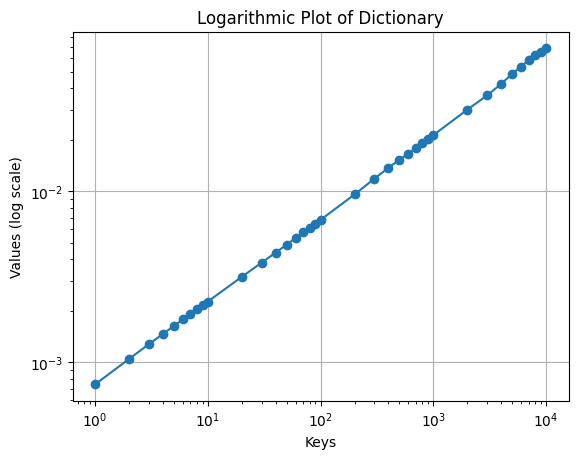

In [ ]:
# Extract keys and values from the dictionary
keys    = list(map(float, results.keys()))
values  = list(map(float, results.values()))

# Plot the data using a logarithmic scale
plt.loglog(keys, values, marker='o')

# Set the x-axis notation to scientific notation (base 10)
#plt.gca().xaxis.set_major_formatter(ScalarFormatter())

# Add labels and title
plt.xlabel('Keys')
plt.ylabel('Values (log scale)')
plt.title('Logarithmic Plot of Dictionary')
plt.xscale('log')
#plt.xticks(keys, keys)  # Set custom tick locations and labels
plt.grid(True)

# Display the plot
plt.show()

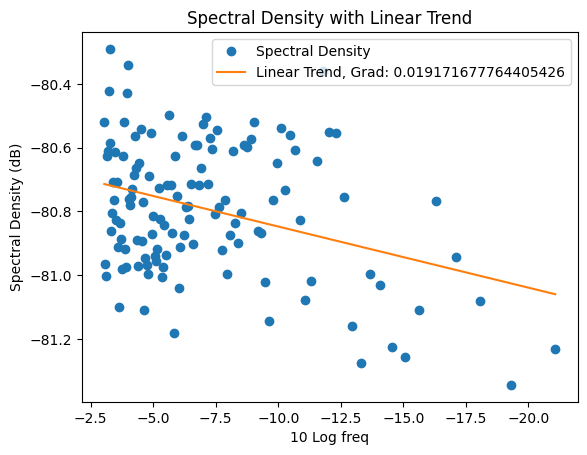

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Generate or load your dataset
data = df_velocity['close'].values  # Example: Random data

# Compute the spectral density using the welch method
frequencies, spectral_density = signal.welch(data, fs=1.0, window = 'hann')

#remove the anomolies
frequencies         = frequencies[2:-1]
spectral_density    = spectral_density[2:-1]

# Convert frequencies to "10 Log freq"
x = 10 * np.log10(frequencies)

# Convert spectral density to decibels (dB)
y = 10 * np.log10(spectral_density / len(spectral_density))

# Fit a linear trend to the log-transformed data
coefficients = np.polyfit(x, y, deg=1)

# Calculate the trendline values
trendline = np.polyval(coefficients, x)

# Plot the spectral density with dB y-axis and "10 Log freq" x-axis
plt.plot(x, y, label='Spectral Density', marker='o', linestyle='none')
plt.plot(x, trendline, label='Linear Trend, Grad: ' + str(coefficients[0]))

plt.xlabel('10 Log freq')
plt.ylabel('Spectral Density (dB)')
plt.title('Spectral Density with Linear Trend')
plt.legend()
plt.gca().invert_xaxis()
plt.show()


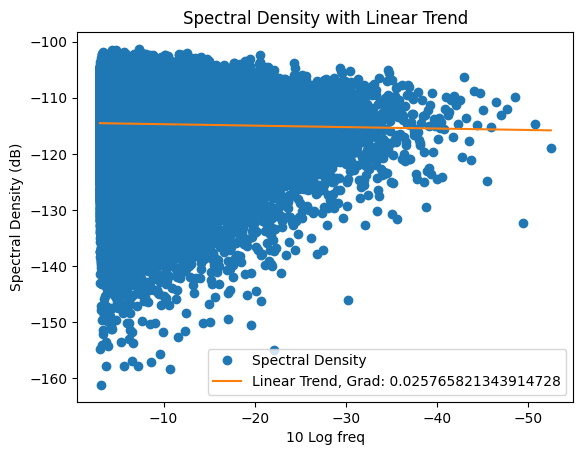

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Generate or load your dataset
data = df_velocity['close'].values  # Example: Random data

# Compute the spectral density using the Lomb-Scargle periodogram
frequencies, spectral_density = signal.periodogram(data)

# Remove the anomalies
frequencies = frequencies[2:-1]
spectral_density = spectral_density[2:-1]

# Convert frequencies to "10 Log freq" using NumPy
x = 10 * np.log10(frequencies)

# Convert spectral density to decibels (dB) using NumPy
y = 10 * np.log10(spectral_density / len(spectral_density))

# Fit a linear trend to the log-transformed data using NumPy
coefficients = np.polyfit(x, y, deg=1)

# Calculate the trendline values
trendline = np.polyval(coefficients, x)

# Plot the spectral density with dB y-axis and "10 Log freq" x-axis
plt.plot(x, y, label='Spectral Density', marker='o', linestyle='none')
plt.plot(x, trendline, label='Linear Trend, Grad: ' + str(coefficients[0]))

plt.xlabel('10 Log freq')
plt.ylabel('Spectral Density (dB)')
plt.title('Spectral Density with Linear Trend')
plt.legend()
plt.gca().invert_xaxis()
plt.show()


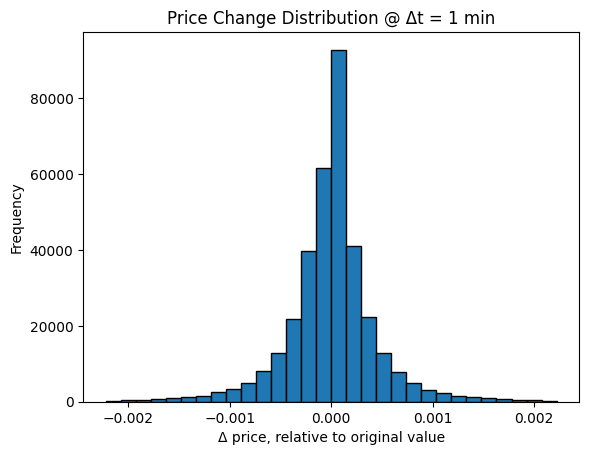

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
data = df_velocity['close']  # Random data

# Define the filter threshold
threshold = 5.5

# Calculate the IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Apply the filter to remove outliers
filtered_data = data[(data >= Q1 - threshold * IQR) & (data <= Q3 + threshold * IQR)]

# Plot the histogram of filtered data
plt.hist(filtered_data, bins=30, edgecolor='black')

# Add labels and title
plt.xlabel('Δ price, relative to original value')
plt.ylabel('Frequency')
plt.title('Price Change Distribution @ Δt = 1 min')

# Display the plot
plt.show()


In [ ]:
import scipy.stats as stats


kurtosis_value = stats.kurtosis(df_velocity['close'].values)

print(kurtosis_value)


2496.3170392524216
